In [1]:
# Importing the librariess
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_olivetti_faces
from sklearn.neighbors import NearestNeighbors

In [2]:
# For reproducibility
np.random.seed(1000)

In [4]:
if __name__ == '__main__':
    # Load the dataset
    faces = fetch_olivetti_faces()
    X = faces['data']

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\acer\scikit_learn_data


In [5]:
    # Create and fit the model
    knn = NearestNeighbors(n_neighbors=10, metric='minkowski', p=2, radius=20.0, algorithm='ball_tree')
    knn.fit(X)

NearestNeighbors(algorithm='ball_tree', n_neighbors=10, radius=20.0)

In [6]:
    # Test face
    i = 20
    test_face = X[i] + np.random.normal(0.0, 0.1, size=(X[0].shape[0]))

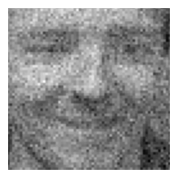

In [7]:
    # Show the test face
    sns.set()
    fig, ax = plt.subplots(figsize=(5, 3))
    ax.imshow(test_face.reshape((64, 64)) * 255.0, cmap='gray')
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

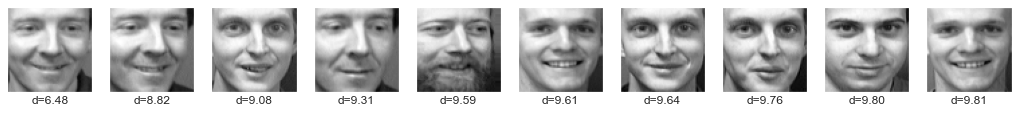

In [8]:
    # Compute and show the top 10 neighbors
    distances, neighbors = knn.kneighbors(test_face.reshape(1, -1))
    fig, ax = plt.subplots(1, 10, figsize=(18, 8))
    for i in range(10):
        idx = neighbors[0][i]
        ax[i].imshow(X[idx].reshape((64, 64)) * 255.0, cmap='gray')
        ax[i].grid(False)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_xlabel('d={0:.2f}'.format(distances[0][i]))
    plt.show()

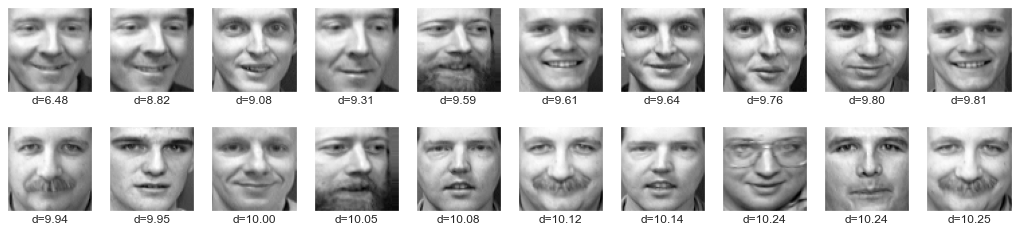

In [9]:
    # Compute and show the nearest 20 neighbors within a radius = 100
    distances, neighbors = knn.radius_neighbors(test_face.reshape(1, -1), radius=100.0)
    sd, sd_arg = np.sort(distances[0]), np.argsort(distances[0])
    fig, ax = plt.subplots(2, 10, figsize=(18, 4))
    for i in range(2):
        for j in range(10):
            idx = neighbors[0][sd_arg[(i * 10) + j]]
            ax[i, j].imshow(X[idx].reshape((64, 64)) * 255.0, cmap='gray')
            ax[i, j].grid(False)
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].set_xlabel('d={0:.2f}'.format(sd[(i * 10) + j]))
    plt.show()